In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import plotly.express as px


### Players Data Cleaning 

In [3]:
players = pd.read_csv("players.csv")
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29455 entries, 0 to 29454
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             29455 non-null  int64  
 1   first_name                            27565 non-null  object 
 2   last_name                             29455 non-null  object 
 3   name                                  29455 non-null  object 
 4   last_season                           29455 non-null  int64  
 5   current_club_id                       29455 non-null  int64  
 6   player_code                           29455 non-null  object 
 7   country_of_birth                      26162 non-null  object 
 8   city_of_birth                         27340 non-null  object 
 9   country_of_citizenship                28188 non-null  object 
 10  date_of_birth                         29410 non-null  object 
 11  sub_position   

<Axes: >

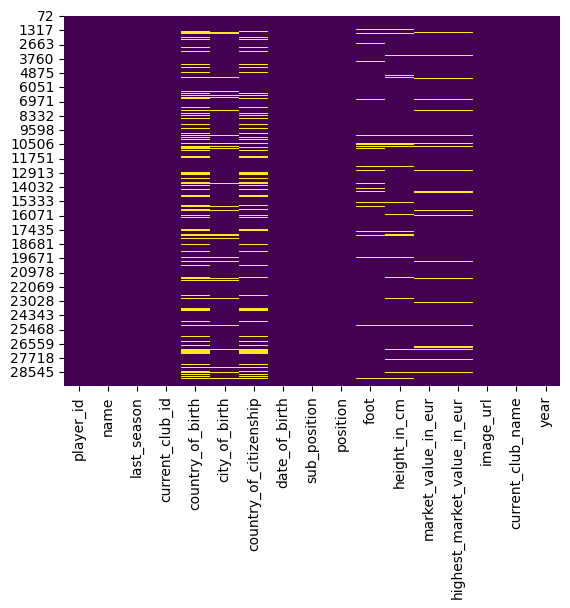

In [194]:
sns.heatmap(players.isnull(), cmap='viridis', cbar=False)

In [5]:
players.loc[:, 'date_of_birth'] = pd.to_datetime(players['date_of_birth'])


C:\Users\oscfa\AppData\Local\Temp\ipykernel_14028\2561978685.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  players.loc[:, 'date_of_birth'] = pd.to_datetime(players['date_of_birth'])


### Merging players and apps 

In [86]:
test = pd.merge(players, apps, on="player_id", how="inner")
test

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,...,player_club_id,player_current_club_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played,year_y
0,18922,Karim Benzema,2022,418,France,Lyon,France,1987-12-19,Centre-Forward,Attack,...,418,418,2014-08-12,Karim Benzema,0,0,0,1,90,2014
1,18922,Karim Benzema,2022,418,France,Lyon,France,1987-12-19,Centre-Forward,Attack,...,418,418,2014-08-19,Karim Benzema,0,0,0,0,90,2014
2,18922,Karim Benzema,2022,418,France,Lyon,France,1987-12-19,Centre-Forward,Attack,...,418,418,2014-08-22,Karim Benzema,0,0,0,0,90,2014
3,18922,Karim Benzema,2022,418,France,Lyon,France,1987-12-19,Centre-Forward,Attack,...,418,418,2014-08-25,Karim Benzema,1,0,1,0,76,2014
4,18922,Karim Benzema,2022,418,France,Lyon,France,1987-12-19,Centre-Forward,Attack,...,418,418,2014-08-31,Karim Benzema,0,0,0,0,90,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675855,586756,Festy Ebosele,2022,410,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right-Back,Defender,...,410,410,2023-04-28,Festy Ebosele,0,0,0,0,14,2023
675856,586756,Festy Ebosele,2022,410,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right-Back,Defender,...,410,410,2023-05-04,Festy Ebosele,0,0,0,0,8,2023
675857,586756,Festy Ebosele,2022,410,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right-Back,Defender,...,410,410,2023-05-08,Festy Ebosele,0,0,0,1,78,2023
675858,586756,Festy Ebosele,2022,410,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right-Back,Defender,...,410,410,2023-05-14,Festy Ebosele,1,0,0,0,61,2023


In [79]:
columns_drop = ["contract_expiration_date", "agent_name", "agent_name", "url", "current_club_domestic_competition_id"]
players = players.drop(columns=columns_drop)


In [7]:
players['year'] = players['date_of_birth'].dt.year


In [96]:
filtered_players = players[(players["height_in_cm"].between(181, 185)) & (players["country_of_birth"].isin(["Spain", "France"])) & (players["market_value_in_eur"].between(2000000, 6500000) & (players["date_of_birth"].between("1996-01-01", "1998-12-31")))]
filtered_players

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,image_url,current_club_name,year
6660,527698,Kike Pérez,2022,366,Spain,Toledo,Spain,1997-02-14,Central Midfield,Midfield,left,184.0,4500000.0,4500000.0,https://img.a.transfermarkt.technology/portrai...,Real Valladolid CF,1997.0
6737,594997,Yohann Magnin,2022,3524,France,Clermont-Ferrand,France,1997-06-21,Defensive Midfield,Midfield,right,183.0,2500000.0,2500000.0,https://img.a.transfermarkt.technology/portrai...,Clermont Foot 63,1997.0
9933,384859,Fabien Centonze,2022,995,France,Voiron,France,1996-01-16,Right-Back,Defender,right,182.0,4000000.0,8000000.0,https://img.a.transfermarkt.technology/portrai...,FC Nantes,1996.0
10389,533158,Loïc Lapoussin,2022,3948,France,Rosny-sous-Bois,Madagascar,1996-03-27,Left Midfield,Midfield,right,181.0,3000000.0,3000000.0,https://img.a.transfermarkt.technology/portrai...,Royale Union Saint Gilloise,1996.0
11483,270393,Robert Skov,2022,533,Spain,Marbella,Denmark,1996-05-20,Right Midfield,Midfield,left,185.0,6500000.0,14000000.0,https://img.a.transfermarkt.technology/portrai...,TSG 1899 Hoffenheim,1996.0
11938,251897,Asier Villalibre,2022,621,Spain,Gernika,Spain,1997-09-30,Centre-Forward,Attack,left,184.0,2500000.0,4500000.0,https://img.a.transfermarkt.technology/portrai...,Athletic Bilbao,1997.0
11939,255995,Mario González,2022,2727,Spain,Villarcayo,Spain,1996-02-25,Centre-Forward,Attack,right,183.0,3500000.0,4000000.0,https://img.a.transfermarkt.technology/portrai...,Oud-Heverlee Leuven,1996.0
11982,374040,Vincent Marchetti,2022,1147,France,Ajaccio,France,1997-07-04,Central Midfield,Midfield,left,181.0,2500000.0,3000000.0,https://img.a.transfermarkt.technology/portrai...,AC Ajaccio,1997.0
12064,422466,Javi Hernández,2022,12321,Spain,Jerez de la Frontera,Spain,1998-05-02,Left-Back,Defender,left,185.0,2500000.0,2500000.0,https://img.a.transfermarkt.technology/portrai...,Girona FC,1998.0
13259,287700,Mohamed Fares,2022,398,France,Aubervilliers,Algeria,1996-02-15,Left Midfield,Midfield,left,183.0,2000000.0,7000000.0,https://img.a.transfermarkt.technology/portrai...,SS Lazio,1996.0


## Player_Valuations Data Cleaning

In [26]:
valuations = pd.read_csv("player_valuations.csv")


In [27]:
columns_drop = ["datetime", "dateweek", "n"]
valuations = valuations.drop(columns=columns_drop)


In [28]:
valuations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434219 entries, 0 to 434218
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            434219 non-null  int64 
 1   last_season                          434219 non-null  int64 
 2   date                                 434219 non-null  object
 3   market_value_in_eur                  434219 non-null  int64 
 4   current_club_id                      434219 non-null  int64 
 5   player_club_domestic_competition_id  434219 non-null  object
dtypes: int64(4), object(2)
memory usage: 19.9+ MB


In [29]:
valuations.groupby("player_club_domestic_competition_id")["market_value_in_eur"].sum().sort_values().tail(5)

player_club_domestic_competition_id
FR1     95922992999
L1     102430931999
IT1    154015896000
ES1    155640405001
GB1    229035959999
Name: market_value_in_eur, dtype: int64

In [33]:
valuations['date'] = pd.to_datetime(valuations['date'])

valuations['year'] = valuations['date'].dt.year


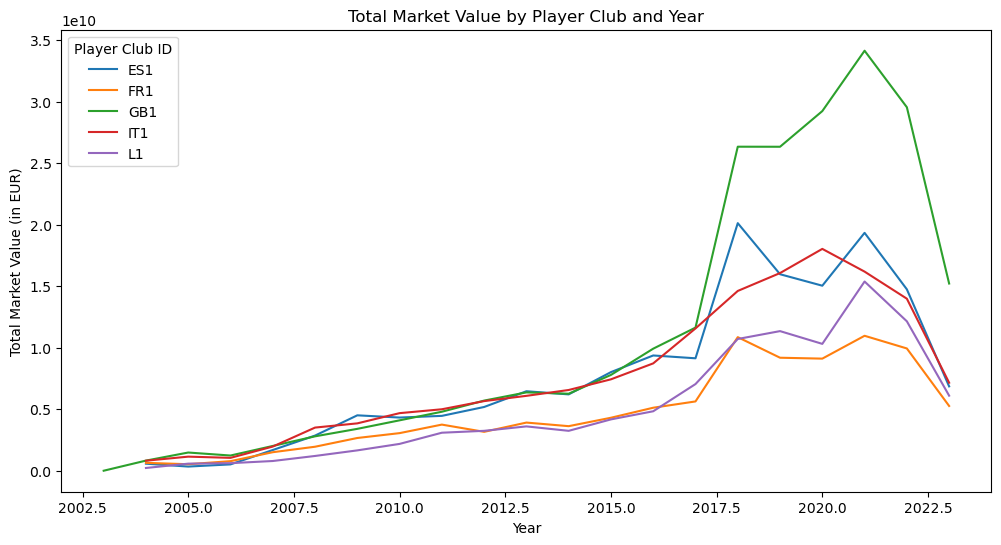

In [34]:
selected_values = ["FR1", "L1", "IT1", "ES1", "GB1"]
filtered_df = valuations[valuations["player_club_domestic_competition_id"].isin(selected_values)]

grouped = filtered_df.groupby(["player_club_domestic_competition_id", "year"])["market_value_in_eur"].sum()

# Use pivot to reshape the data for plotting
pivot_data = grouped.reset_index().pivot(index="year", columns="player_club_domestic_competition_id", values="market_value_in_eur")

# Plot the data
pivot_data.plot(kind='line', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Market Value (in EUR)')
plt.title('Total Market Value by Player Club and Year')
plt.legend(title='Player Club ID', loc='best')
plt.show()

In [112]:
players.loc[players["player_id"] == 251896]

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,image_url,current_club_name,year
27572,251896,Jesús Vallejo,2022,418,Spain,Zaragoza,Spain,1997-01-05,Centre-Back,Defender,right,184.0,2000000.0,15000000.0,https://img.a.transfermarkt.technology/portrai...,Real Madrid,1997.0


In [38]:
columns_drop = ["club_code", "domestic_competition_id", "url", "coach_name", "net_transfer_record", "foreigners_percentage", "total_market_value" ]
club = club.drop(columns=columns_drop)

### Appearences Data Cleaning 

In [39]:
apps = pd.read_csv("appearances.csv")

In [40]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185261 entries, 0 to 1185260
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1185261 non-null  object
 1   game_id                 1185261 non-null  int64 
 2   player_id               1185261 non-null  int64 
 3   player_club_id          1185261 non-null  int64 
 4   player_current_club_id  1185261 non-null  int64 
 5   date                    1185261 non-null  object
 6   player_name             1184937 non-null  object
 7   competition_id          1185261 non-null  object
 8   yellow_cards            1185261 non-null  int64 
 9   red_cards               1185261 non-null  int64 
 10  goals                   1185261 non-null  int64 
 11  assists                 1185261 non-null  int64 
 12  minutes_played          1185261 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 117.6+ MB


In [41]:
columns_drop = ["competition_id"]
apps = apps.drop(columns=columns_drop)

In [73]:
apps['date'] = pd.to_datetime(apps['date'])
apps["year"] = apps["date"].dt.year


In [ ]:
merged_df.loc[merged_df["player_name"] == "Jesús Vallejo"].groupby("name")["date"].count().plot(kind="bar")

In [71]:

# Step 1: Calculate the overall mean of 'minutes_played'
overall_mean_minutes_played = apps["minutes_played"].mean()

# Step 2: Filter the DataFrame to include only players above the overall mean
filtered_apps = apps[apps["minutes_played"] > overall_mean_minutes_played]

# Step 3: Group by 'player_name' and calculate the mean goals for each player
mean_goals_by_player = filtered_apps["assists"].mean()
mean_goals_by_player

0.08705373133202879

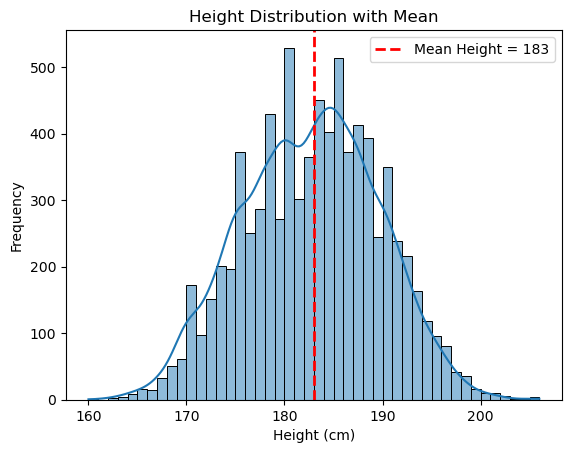

In [43]:


# Create the histogram with KDE
sns.histplot(players['height_in_cm'], kde=True)

# Calculate the mean
mean_height = players['height_in_cm'].mean().round()

# Add a vertical line at the mean
plt.axvline(mean_height, color='red', linestyle='dashed', linewidth=2, label=f'Mean Height = {mean_height:.0f}')

# Add labels and legend
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Height Distribution with Mean')
plt.legend()

# Show the plot
plt.show()


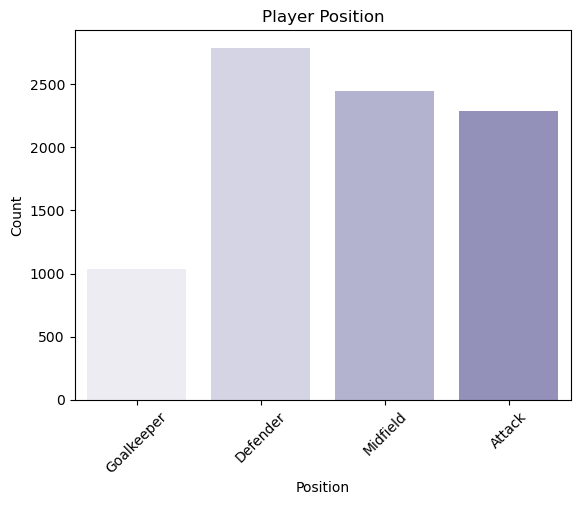

In [107]:
palette = sns.color_palette("Purples")
positions = ["Goalkeeper", "Defender", "Midfield", "Attack"]
sns.countplot(x="position", data=players, palette=palette, order=positions)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Player Position')
plt.xticks(rotation=45)
plt.show()

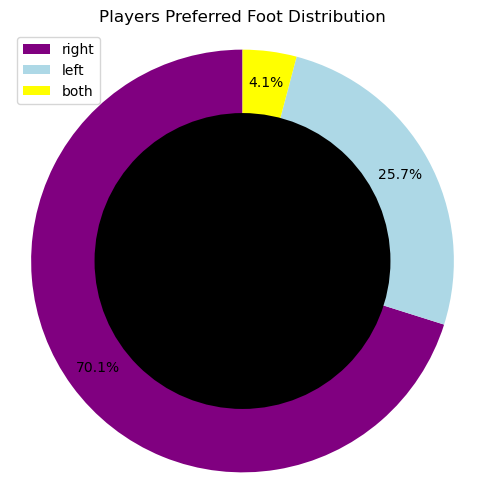

In [109]:
foot_counts = players['foot'].value_counts()

# Define colors for the pie chart
colors = ['#800080', '#ADD8E6', '#FFFF00']

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
wedges, texts, autotexts = plt.pie(foot_counts, labels=None, autopct='%1.1f%%', colors=colors, startangle=90, pctdistance=0.85)

# Draw a circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title and legend
plt.title('Players Preferred Foot Distribution')
plt.legend(foot_counts.index, loc='upper left')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.savefig("plot_with_transparent_background.png", transparent=True)

plt.show()




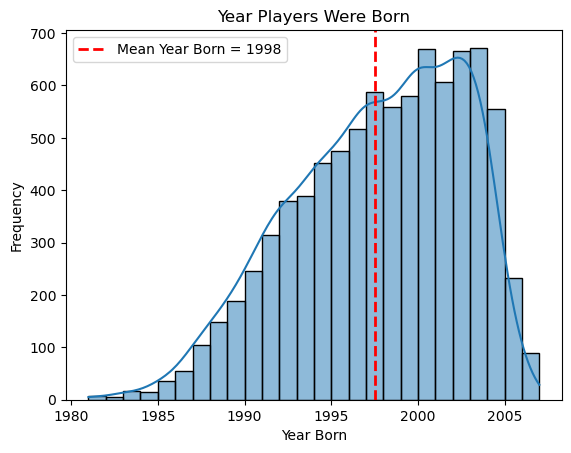

In [106]:
sns.histplot(players['year'], kde=True, bins=26)

# Calculate the mean
mean_age = players['year'].mean()

# Add a vertical line at the mean
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Year Born = {mean_age:.0f}')

# Add labels and legend
plt.xlabel('Year Born')
plt.ylabel('Frequency')
plt.title('Year Players Were Born')
plt.legend()

# Show the plot
plt.show()

### Clubs 

In [49]:
clubs = pd.read_csv("clubs.csv")

### Map where players are from 

In [50]:
pip install folium


In [56]:


# Sample data with player nationalities and count
player_countries = players["country_of_birth"].value_counts().nlargest()

# Create a map
m = folium.Map(location=[50, 10], zoom_start=3)

marker_cluster = MarkerCluster().add_to(m)

for country, count in player_countries.items():
    # Filter the countries DataFrame to get the location of the current country
    country_location = nats.loc[nats["Country"] == country, "location"]
    
    # Check if there are any rows for the current country before accessing the location
    if not country_location.empty:
        country_location = country_location.iloc[0]
        
        folium.Marker(
            location=country_location,
            icon=None,  # You can customize the marker icon if needed
            popup=f"{country}: {count} players",
        ).add_to(marker_cluster)

m.save('player_nationalities_map.html')


In [51]:
countries = pd.read_csv("countries.csv")
countries['Country'] = countries['Country'].replace('United Kingdom', 'England')


In [53]:
nats = countries.loc[countries["Country"].isin(["France", "Spain", "England", "Netherlands", "Germany"])]

In [54]:
player_countries = players.country_of_birth.value_counts().nlargest()
player_countries.items

<bound method Series.items of France         617
Spain          523
England        417
Netherlands    397
Germany        382
Name: country_of_birth, dtype: int64>

In [55]:
nats = countries.loc[countries["Country"].isin(["France", "Spain", "England", "Netherlands", "Germany"])]

nats["location"] = list(zip(nats["Latitude"], nats["Longitude"]))

# Display the resulting DataFrame
nats

C:\Users\oscfa\AppData\Local\Temp\ipykernel_14028\2413316284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nats["location"] = list(zip(nats["Latitude"], nats["Longitude"]))


,Country,Importance,Altitude,Latitude,Longitude,location
61,France,1.023326,0.0,46.603354,1.888334,"(46.603354, 1.8883335)"
65,Germany,0.889681,0.0,51.083420,10.423447,"(51.0834196, 10.4234469)"
120,Netherlands,0.829417,0.0,52.500170,5.748082,"(52.5001698, 5.7480821)"
156,Spain,0.865553,0.0,39.326234,-4.838065,"(39.3262345, -4.8380649)"
175,England,1.072378,0.0,54.702354,-3.276575,"(54.7023545, -3.2765753)"


### Comparing Vajello to Other players 

In [57]:
valuations.loc[valuations["player_id"] == 251896].groupby("year")["market_value_in_eur"].mean()

year
2015    1.133333e+06
2016    3.333333e+06
2017    1.033333e+07
2018    1.225000e+07
2019    1.000000e+07
2020    6.500000e+06
2021    4.333333e+06
2022    2.750000e+06
2023    2.000000e+06
Name: market_value_in_eur, dtype: float64

C:\Users\oscfa\AppData\Local\Temp\ipykernel_14028\1075333630.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



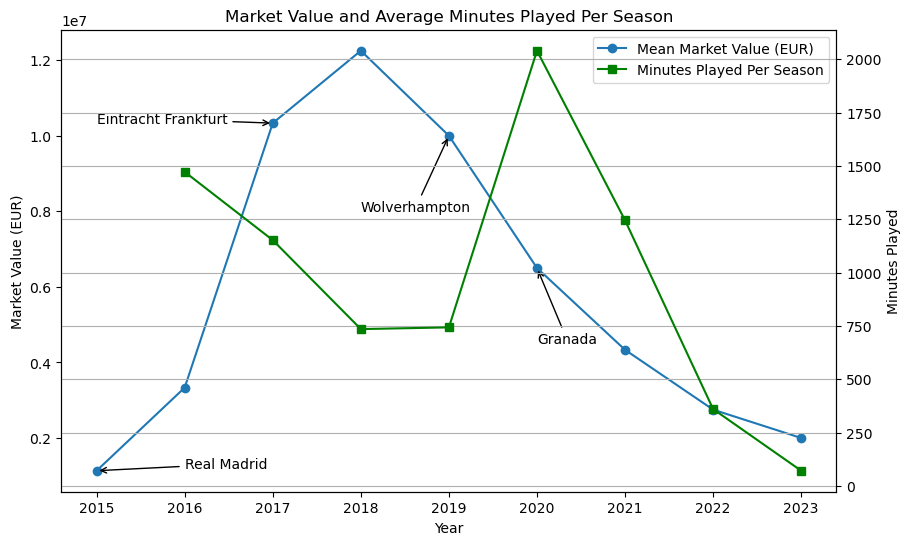

In [193]:

fig, ax1 = plt.subplots(figsize=(10, 6))
p1 = apps.loc[apps["player_id"] == 251896].groupby("year")["minutes_played"].sum()


player_id = 251896
player_data = valuations[valuations["player_id"] == player_id]
player_data["year"] = player_data["date"].dt.year
mean_market_value_by_year = player_data.groupby("year")["market_value_in_eur"].mean()

# Plot mean market value on the primary y-axis
ax1.plot(mean_market_value_by_year.index, mean_market_value_by_year.values, marker='o', linestyle='-', label='Mean Market Value (EUR)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Market Value (EUR)')
ax1.set_title('Market Value and Average Minutes Played Per Season')

# Create a secondary y-axis for average minutes played
ax2 = ax1.twinx()

# Plot average minutes played on the secondary y-axis
ax2.plot(p1.index, p1.values, marker='s', linestyle='-', color='green', label='Minutes Played Per Season')
ax2.set_ylabel('Minutes Played')
ax2.grid(False)


# Add legends for both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Annotate important points (optional)
ax1.annotate('Real Madrid', xy=(2015, 1.133333e+06), xytext=(2016, 1.2e+06),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax1.annotate('Eintracht Frankfurt', xy=(2017, 1.033333e+07), xytext=(2015, 1.0333e+07),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax1.annotate('Wolverhampton', xy=(2019, 1.000000e+07), xytext=(2018, 0.8e+07),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax1.annotate('Granada', xy=(2020, 6.500000e+06), xytext=(2020, 0.45e+07),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.grid(True)

plt.show()


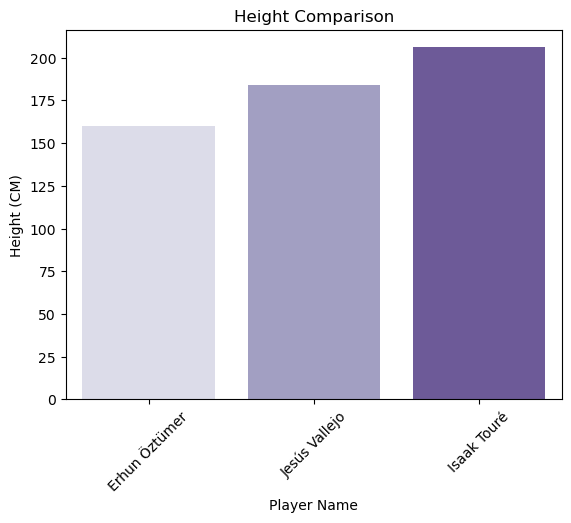

In [123]:
player1 = "Erhun Öztümer"
player2 = 'Jesús Vallejo'
player3 = "Isaak Touré"

# Filter the DataFrame to include only players
selected_players = test[test['name'].isin([player1, player2, player3])]
desired_order = [player1, player2, player3]
# Create the bar plot
sns.barplot(data=selected_players, x="name", y="height_in_cm", order=desired_order, palette='Purples')
plt.xlabel('Player Name')
plt.ylabel('Height (CM)')
plt.title('Height Comparison')
plt.xticks(rotation=45)
plt.show()

In [124]:
players.loc[players["name"] == "Kylian Mbappé"]

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,image_url,current_club_name,year
4546,342229,Kylian Mbappé,2022,583,NaN,Paris,NaN,1998-12-20,Centre-Forward,Attack,right,178.0,180000000.0,200000000.0,https://img.a.transfermarkt.technology/portrai...,Paris Saint-Germain,1998.0


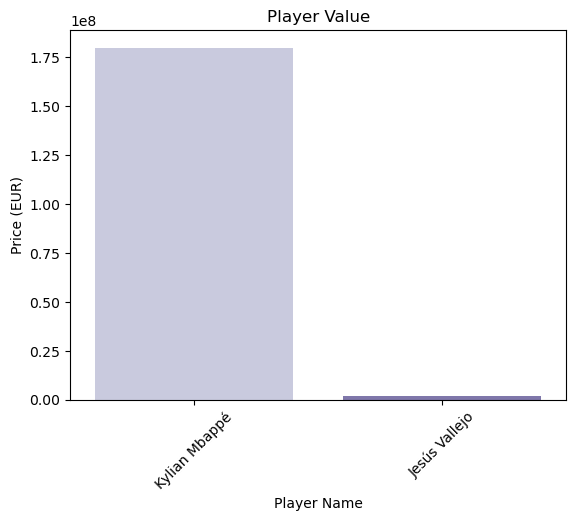

In [154]:
player1 = "Kylian Mbappé"
player2 = 'Jesús Vallejo'

# Filter the DataFrame to include only players
selected_players = test[test['name'].isin([player1, player2])]
# Create the bar plot
sns.barplot(data=selected_players, x="name", y="market_value_in_eur", palette='Purples')
plt.xlabel('Player Name')
plt.ylabel('Price (EUR)')
plt.title('Player Value')
plt.xticks(rotation=45)
plt.show()

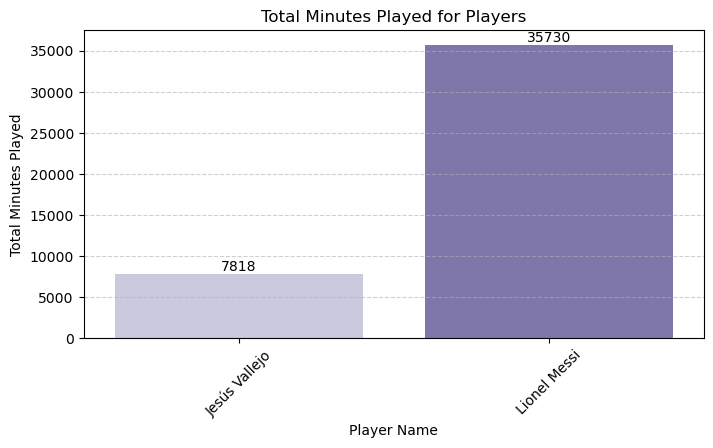

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt


players_to_plot = ["Lionel Messi", "Jesús Vallejo"]
filtered_players = apps[apps['player_name'].isin(players_to_plot)]

# Calculate the total minutes played for each player
total_minutes_played = filtered_players.groupby("player_name")["minutes_played"].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 4))
sns.barplot(data=total_minutes_played, x="player_name", y="minutes_played", palette='Purples')

# Annotate the values on top of the bars
for index, row in total_minutes_played.iterrows():
    plt.text(index, row['minutes_played'], f'{row["minutes_played"]}', va='bottom', ha='center')

plt.xlabel('Player Name')
plt.ylabel('Total Minutes Played')
plt.title('Total Minutes Played for Players')
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [171]:
apps.groupby("player_name")["minutes_played"].sum().mean()

4172.408477842004

In [186]:

# Sample data (replace with your actual data)
# Assume you have a DataFrame named 'valuations' with columns 'player_name' and 'market_value_in_eur'

# Filter the DataFrame for Jesús Vallejo and Lionel Messi
players_to_plot = ["Jesús Vallejo", "Kylian Mbappé"]
filtered_players = test[test['name'].isin(players_to_plot)]

# Create the bubble chart
fig = px.scatter(filtered_players, x='name', y='market_value_in_eur', 
                 size='market_value_in_eur', color='player_name',
                 labels={'market_value_in_eur': 'Market Value (EUR)'}, 
                 title='Valuation Comparison: Vallejo vs Mbappe',
                width=400,
                size_max=60)

# Customize the appearance of the bubble chart
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers+text'))

# Show the chart
fig.show()
